## Lab 1: Skydiver

Describes the velocity as a function of time $v(t)$ for 

A skydiver jumps from a plane at $h=2000\mathrm{m}$. At $h_\mathrm{p} = 300\mathrm{m}$ the skydiver releases the parachute. How does the velocity evolve as a function of height?

1. Calculate problem constant $$k = \frac{1}{2} \frac{C_\mathrm{D} \rho A}{m}$$  as introduced in class using the astropy units package.
2. In addition to the differential equation $\frac{dv}{dt}$ derived in class solve simultaneously the differential equation $\frac{dh}{dt} = v$.
2. Your plot should include a line for the analytically determined terminal velocity.
3. From the terminal velocity, estimate an appropropriate time step for the integration.
4. Perform a convergence study by doing a series of 3 to 4 runs with decreasing step size.

Please remember the instructions how to approach a programming task:

1. Sketch out the algorithm you want to use. This can involve some kind of flow-diagram and writing out the program in pseudo-programing language.
2. Implement algorithm; while you write it add reasonable comments, short and relevant. Test each step to make sure you avoid accumulating errors that are harder to find later on.
3. Run algorithm and generate results.
4. Test the program carefully. What can you do to convince yourself that your algorithm is working correctly?
den = 1.225 kg/m^3
A = 1 m^2
m = 70 kg

In [4]:
#1) Calculate problem constant:
air_den = 1.225; A = 1; m = 70; Cd = 0.3; g =9.81

k = (1/2)*(Cd*air_den*A)/m

In [ ]:
#2) Solve the differential equation (dh/dt) = v

In [11]:
import astropy.units as u

v_t = sqrt(g/k)

In [12]:
#estimate time step
dt=(1000./v_t)/20.      #estimate time step
print(dt)

0.817899898917


In [53]:
def rhs_sdiver(v,dt):
    'Evaluate RHS for skydiver problem, advance one time step'
    deltav = dt*(k*v**2 - g)
    return deltav

In [54]:
#V = 0
v=rhs_sdiver(0,dt)
print(v)

-8.02359800838


In [55]:
v+=rhs_sdiver(v,dt)
print(v)

-15.9089770042


In [56]:
tt=[]
vv=[]
hh=[]
h = 2000
t=0; v=0

In [59]:
while h > 300:
    deltav=rhs_sdiver(v,dt)
    v += deltav
    t += dt
    h += (v-.5*(deltav))*dt
    tt.append(t)
    vv.append(v)
    hh.append(h)

In [75]:
import numpy as np
vterm = -1*np.sqrt(g/k)

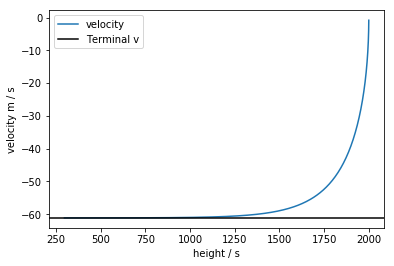

In [88]:
figure(1)
plot(array(hh),array(vv), label = "velocity")
axhline(vterm, c='k', label = "Terminal v")
xlabel('height / s')
ylabel('velocity m / s')
legend(loc = "upper left")
show()
close()

In [83]:
#4) estimate an appropriate time step
tstep = h/vterm
dtnew = abs(tstep)/50

In [84]:
tt=[]
vv=[]
hh=[]
h = 2000
t=0; v=0

while h > 300:
    deltav=rhs_sdiver(v,dtnew)
    v += deltav
    t += dt
    h += (v-.5*(deltav))*dtnew
    tt.append(t)
    vv.append(v)
    hh.append(h)

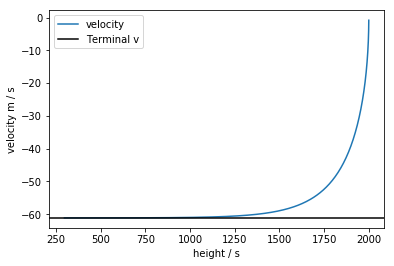

In [89]:
figure(2)
plot(array(hh),array(vv), label = "velocity")
axhline(vterm, c='k', label = "Terminal v")
xlabel('height / s')
ylabel('velocity m / s')
legend(loc = "upper left")
show()
close()